In [1]:
import warnings
warnings.filterwarnings('ignore')
import pyterrier as pt
if not pt.started():
    pt.init()

import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 100)
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

import glob
import ir_measures
from ir_measures import * # imports all supported measures, e.g., AP, nDCG, RR, P

Java started and loaded: pyterrier.java, pyterrier.terrier.java [version=5.11 (build: craig.macdonald 2025-01-13 21:29), helper_version=0.0.8]
/tmp/ipykernel_968/3019505593.py:5: DeprecationWarning: Call to deprecated method pt.init(). Deprecated since version 0.11.0.
java is now started automatically with default settings. To force initialisation early, run:
pt.java.init() # optional, forces java initialisation
  pt.init()


In [39]:
# df = pd.read_csv('/nfs/primary/retrievability-bias/results/dec4/result_all_models_all_groups.csv', index_col=0).reset_index()

# df1 = df[(df['modelname'] == 'bm25_tctcolbert') & (df['gsize'] == 50)].sort_values(by='threshold')
# df1
# df = pd.read_csv('/nfs/primary/retrievability-bias/results/dec4/result_all_models_all_groups.csv', index_col=0).reset_index()
# for modelname in ['bm25', 'bm25_monot5', 'splade', 'tctcolbert', 'bm25_tctcolbert']:
#     for gsize in [10,20,50,100,200]:
#         df1 = df[(df['modelname'] == modelname) & (df['gsize'] == gsize)].sort_values(by='threshold')
#         a = ' & '.join([f'{num:.4f}' for num in df1['mean_gini'].to_list()])
#         print(modelname, gsize, '--:', a + ' \\\\')

In [40]:
# csv = f'/nfs/primary/retrievability-bias/results/integrated2000/result_all_models_all_groups.csv'
# df = pd.read_csv(csv, index_col=0).reset_index()
# df = df.round(2)
# for modelname in ['bm25', 'bm25_monot5', 'splade', 'tctcolbert', 'bm25_tctcolbert']:
#     for gsize in [10,20,50,100,200]:
#         df1 = df[(df['modelname'] == modelname) & (df['gsize'] == gsize)].sort_values(by='threshold')
#         a = ' & '.join([f'{num:.4f}' for num in df1['mean_gini'].to_list()])
#         print(modelname, gsize, '--:', a + ' \\\\')

In [41]:
# csv = f'/nfs/primary/retrievability-bias/results/integrated2000/result_all_models_all_groups.csv'
# df = pd.read_csv(csv, index_col=0).reset_index()
# bm25 = df[(df['modelname'] == 'bm25') & (df['threshold'] == 0)]
# bm25

In [42]:
# bm25 = df[(df['modelname'] == 'bm25') & (df['threshold'] == 0)]
# bm25_monot5 = df[(df['modelname'] == 'bm25_monot5') & (df['threshold'] == 0)]
# splade = df[(df['modelname'] == 'splade') & (df['threshold'] == 0)]
# tctcolbert = df[(df['modelname'] == 'tctcolbert') & (df['threshold'] == 0)]
# bm25_tctcolbert = df[(df['modelname'] == 'bm25_tctcolbert') & (df['threshold'] == 0)]

In [43]:
# x = bm25['gsize'].to_list()
# x = [1,2,3,4,5]

In [44]:
# plt.figure(figsize=(7,5))
# import matplotlib.pyplot as plt
# import matplotlib.ticker as ticker
# def format_ticks(value, tick_number):
#     return f'{value:.4f}'

# # plt = plt.gca()  # Get the current Axes
# # plt.yaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

# col = 'min_gini'
# ylabel = 'Min Gini Coefficient'
# filename = 'groups_min_gini.pdf'

# col = 'mean_gini'
# ylabel = 'Mean Gini Coefficient'
# filename = 'groups_mean_gini.pdf'

# y = bm25[col]
# plt.plot(x,y,label='BM25', marker='.')
# y = bm25_monot5[col]
# plt.plot(x,y,label='BM25_monot5', marker='.')
# y = splade[col]
# plt.plot(x,y,label='Splade', marker='.')
# y = tctcolbert[col]
# plt.plot(x,y,label='TCTColbert', marker='.')
# y = bm25_tctcolbert[col]
# plt.plot(x,y,label='BM25_TCTColbert', marker='.')

# # y_all = [0.4820,0.4254,0.3856,0.3902,0.4323]

# plt.title('Exposure Fairness')
# plt.xlabel('Group')
# plt.ylabel(ylabel)
# # plt.xticks(ticks = [10,20,50,100,200])
# plt.xticks(ticks = [1,2,3,4,5], labels = ['Label A', 'Label B', 'Label C', 'Label D', 'Label E'])
# plt.legend(fontsize=12)
# plt.savefig(f'./results/dec4/{filename}', format="pdf", bbox_inches="tight", pad_inches=0.3)
# plt.show()

In [45]:
# dfg_bm25 = df.loc[df['Model'] == 'BM25',['nDCG@10','nDCG@10.1','nDCG@10.2','nDCG@10.3']]
# dfg_monot5 = df.loc[df['Model'] == 'BM25>>Mono-T5',['nDCG@10','nDCG@10.1','nDCG@10.2','nDCG@10.3']]
# dfg_Splade = df.loc[df['Model'] == 'Splade',['nDCG@10','nDCG@10.1','nDCG@10.2','nDCG@10.3']]
# dfg_ColBERT = df.loc[df['Model'] == 'ColBERT',['nDCG@10','nDCG@10.1','nDCG@10.2','nDCG@10.3']]
# dfg_bm25_ColBERT = df.loc[df['Model'] == 'BM25>>ColBERT',['nDCG@10','nDCG@10.1','nDCG@10.2','nDCG@10.3']]

In [46]:
# gini_bm25 = df.loc[df['Model'] == 'BM25',['Gini','Gini.1','Gini.2','Gini.3']]
# gini_monot5 = df.loc[df['Model'] == 'BM25>>Mono-T5',['Gini','Gini.1','Gini.2','Gini.3']]
# gini_Splade = df.loc[df['Model'] == 'Splade',['Gini','Gini.1','Gini.2','Gini.3']]
# gini_ColBERT = df.loc[df['Model'] == 'ColBERT',['Gini','Gini.1','Gini.2','Gini.3']]
# gini_bm25_ColBERT = df.loc[df['Model'] == 'BM25>>ColBERT',['Gini','Gini.1','Gini.2','Gini.3']]

In [47]:
csv = f'/nfs/primary/retrievability-bias/results/new_clustered/result_all_models_all_groups.csv'
df = pd.read_csv(csv, index_col=0).reset_index()
df['max_gini'].min()

0.4887

In [48]:
bm25 = df[(df['modelname'] == 'bm25') & (df['threshold'] == 30)]
bm25.head()

,modelname,threshold,grps,min_gini,mean_gini,max_gini,nDCG@10,RR
1,bm25,30,500,0.1898,0.3020,0.5755,NaN,NaN
5,bm25,30,1000,0.1793,0.2905,0.6072,NaN,NaN
9,bm25,30,2000,0.1683,0.2772,0.6708,NaN,NaN
13,bm25,30,5000,0.1431,0.2541,0.6364,NaN,NaN
17,bm25,30,10000,0.1412,0.2359,0.6357,NaN,NaN


In [91]:
# csv = f'/nfs/primary/retrievability-bias/results/expt1/result_all_models_all_groups_avg_rscore_new_gini.csv'
# df = pd.read_csv(csv, index_col=0).reset_index()

In [92]:
# csv = f'/nfs/primary/retrievability-bias/results/expt_from_start/result_all_models_all_groups_avg_rscore_r100_new_gini.csv'
csv = f'/nfs/primary/retrievability-bias/results/restore/result_all_models_all_groups.csv'
df = pd.read_csv(csv, index_col=0).reset_index()

In [93]:
df.head()

,modelname,threshold,grps,min_gini,mean_gini,max_gini,nDCG@10,RR
0,bm25,0,500,0.1906,0.2936,0.5632,NaN,NaN
1,bm25,30,500,0.1898,0.3020,0.5755,NaN,NaN
2,bm25,60,500,0.2009,0.3271,0.5847,NaN,NaN
3,bm25,90,500,0.2372,0.4023,0.6741,NaN,NaN
4,bm25,0,1000,0.1776,0.2835,0.6098,NaN,NaN


In [162]:
def sub_plot(plt,threshold,title,col, ylabel):
    bm25 = df[(df['modelname'] == 'bm25') & (df['threshold'] == threshold)]
    bm25_monot5 = df[(df['modelname'] == 'bm25_monot5') & (df['threshold'] == threshold)]
    splade = df[(df['modelname'] == 'splade') & (df['threshold'] == threshold)]
    tctcolbert = df[(df['modelname'] == 'tctcolbert') & (df['threshold'] == threshold)]
    bm25_tctcolbert = df[(df['modelname'] == 'bm25_tctcolbert') & (df['threshold'] == threshold)]

    x = [1,2,3,4,5]
    # col = 'min_gini'
    y = bm25[col]
    line1, = plt.plot(x,y,label='BM25', marker='.')
    y = bm25_monot5[col]
    line2, = plt.plot(x,y,label='BM25>>Mono-T5', marker='.')
    y = splade[col]
    line3, = plt.plot(x,y,label='SPLADE', marker='.')
    y = tctcolbert[col]
    line4, = plt.plot(x,y,label='TCT-ColBERT', marker='.')
    y = bm25_tctcolbert[col]
    line5, = plt.plot(x,y,label='BM25>>TCT-ColBERT', marker='.')


    # plt.set_title('Exposure Fairness')
    plt.set_title(title, fontsize=16)
    plt.set_xlabel(r'#Groups ($K$)', fontsize=16)
    
    if threshold ==0:
        # ylabel = 'Min Gini Coefficient'
        plt.set_ylabel(ylabel, fontsize=16)
    plt.set_xticks(ticks = x, labels = ['500', '1000', '2000', '5000', '10000'], fontsize=16)
    # plt.set_yticks(ticks = y, labels = [f'{i:.2f}' for i in y])
    return line1, line2,line3,line4,line5

    # plt.legend(loc='lower left', fontsize=11)


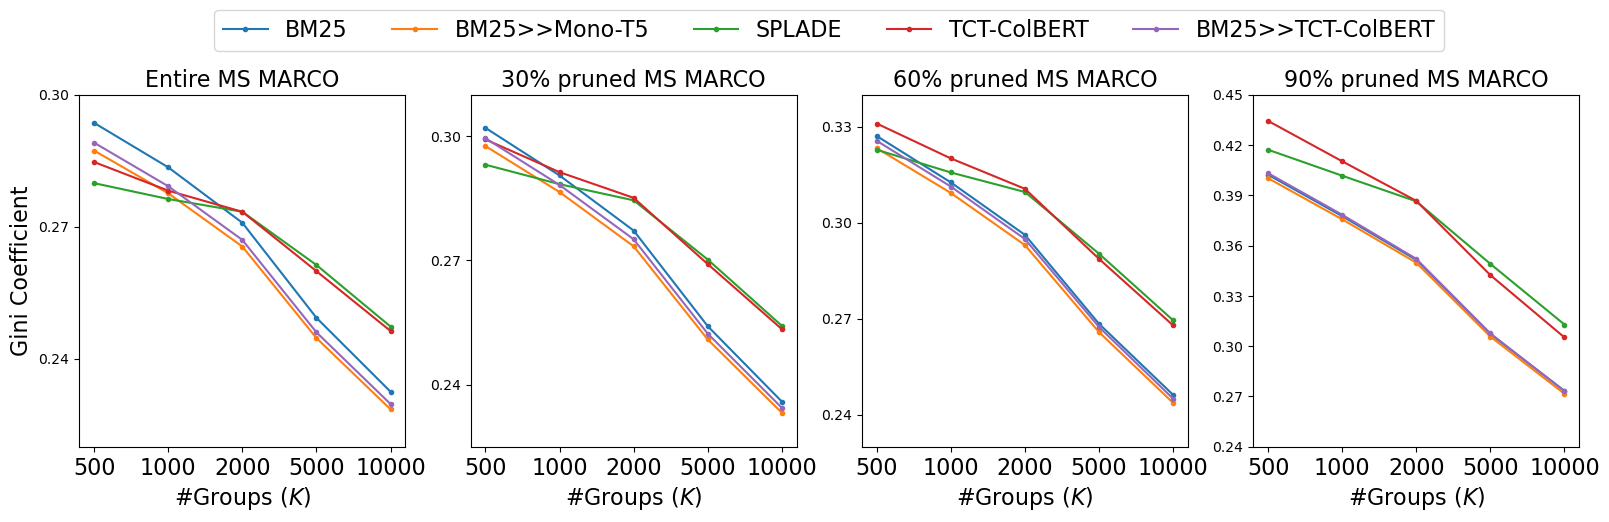

In [163]:
fig, (ax0,ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
# plt.subplots_adjust(hspace=1, wspace=0.2, left=0.1)
plt.subplots_adjust(hspace=1, wspace=0.2, left=0, right=1, bottom=0)

col = 'mean_gini'
ylabel = 'Gini Coefficient'

ax0.xaxis.set_major_locator(MultipleLocator(1))
ax0.yaxis.set_major_locator(MultipleLocator(0.03))
# ax0.set_xlim(1,5)
ax0.set_ylim(0.22,0.30)
g0 = sub_plot(ax0,0,'Entire MS MARCO',col, ylabel)

ax1.xaxis.set_major_locator(MultipleLocator(1))
ax1.yaxis.set_major_locator(MultipleLocator(0.03))
# ax1.set_xlim(1,5)
ax1.set_ylim(0.225,0.31)
g1 = sub_plot(ax1,30,'30% pruned MS MARCO',col, ylabel)

ax2.xaxis.set_major_locator(MultipleLocator(1))
ax2.yaxis.set_major_locator(MultipleLocator(0.03))
# ax2.set_xlim(1,5)
ax2.set_ylim(0.23,0.34)
g2 = sub_plot(ax2,60, '60% pruned MS MARCO',col, ylabel)

ax3.xaxis.set_major_locator(MultipleLocator(1))
ax3.yaxis.set_major_locator(MultipleLocator(0.03))
# ax3.set_xlim(1,5)
ax3.set_ylim(0.24,0.45)
g3 = sub_plot(ax3,90,'90% pruned MS MARCO',col, ylabel)

g = list(g0 + g1 + g2 + g3)

fig.legend(handles=g0, loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=10, fontsize=16)
filename = f'groups_{col}.pdf'
plt.savefig(f'./results/new_clustered/{filename}', format="pdf", bbox_inches="tight", pad_inches=0)
plt.show()

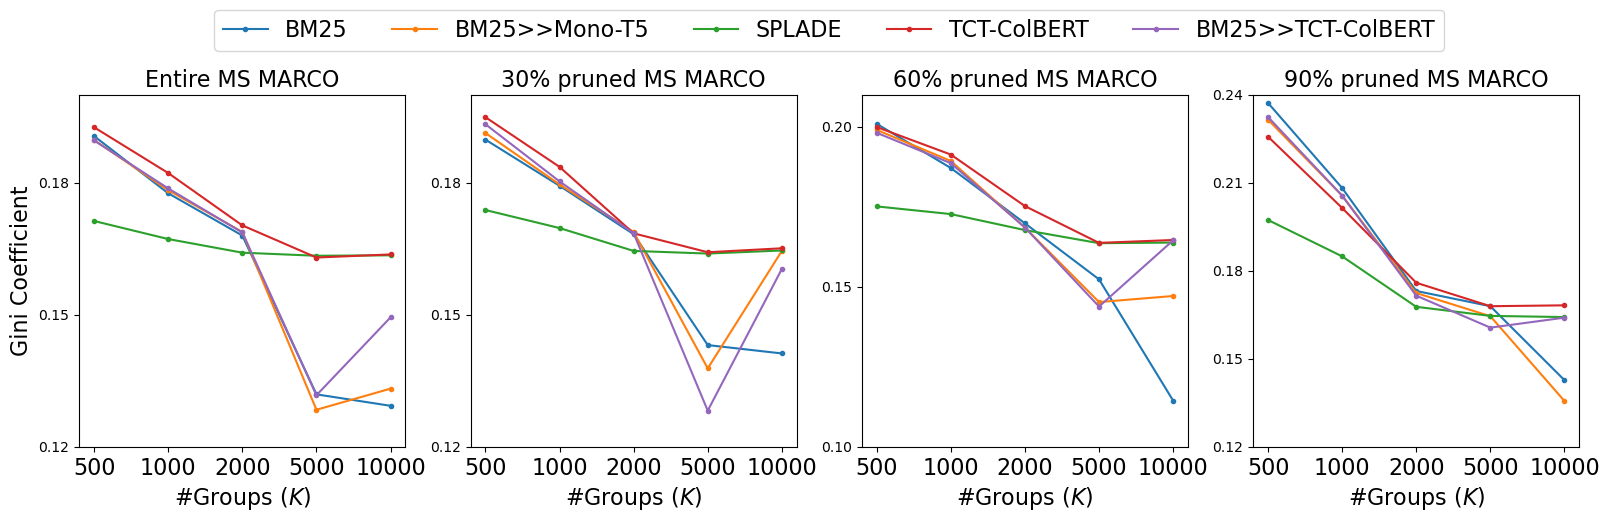

In [164]:
fig, (ax0,ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
# plt.subplots_adjust(hspace=1, wspace=0.2, left=0.1)
plt.subplots_adjust(hspace=1, wspace=0.2, left=0, right=1, bottom=0)

col = 'min_gini'
ylabel = 'Gini Coefficient'

ax0.xaxis.set_major_locator(MultipleLocator(1))
ax0.yaxis.set_major_locator(MultipleLocator(0.03))
# ax0.set_xlim(1,5)
ax0.set_ylim(0.12,0.20)
g0 = sub_plot(ax0,0,'Entire MS MARCO',col, ylabel)

ax1.xaxis.set_major_locator(MultipleLocator(1))
ax1.yaxis.set_major_locator(MultipleLocator(0.03))
# ax1.set_xlim(1,5)
ax1.set_ylim(0.12,0.20)
g1 = sub_plot(ax1,30,'30% pruned MS MARCO',col, ylabel)

ax2.xaxis.set_major_locator(MultipleLocator(1))
ax2.yaxis.set_major_locator(MultipleLocator(0.05))
# ax2.set_xlim(1,5)
ax2.set_ylim(0.10,0.21)
g2 = sub_plot(ax2,60, '60% pruned MS MARCO',col, ylabel)

ax3.xaxis.set_major_locator(MultipleLocator(1))
ax3.yaxis.set_major_locator(MultipleLocator(0.03))
# ax3.set_xlim(1,5)
ax3.set_ylim(0.12,0.24)
g3 = sub_plot(ax3,90,'90% pruned MS MARCO',col, ylabel)

g = list(g0 + g1 + g2 + g3)
fig.legend(handles=g0, loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=10, fontsize=16)
filename = f'groups_{col}.pdf'
plt.savefig(f'./results/new_clustered/{filename}', format="pdf", bbox_inches="tight", pad_inches=0)
plt.show()

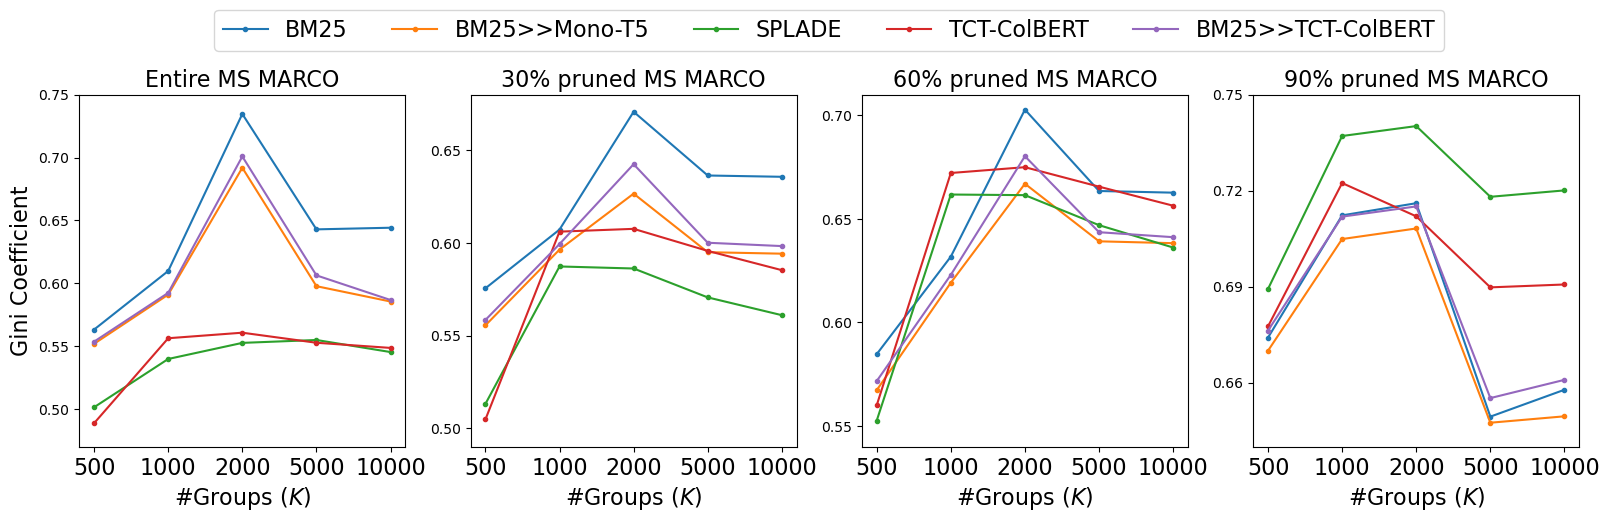

In [165]:
fig, (ax0,ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
# plt.subplots_adjust(hspace=1, wspace=0.2, left=0.1)
plt.subplots_adjust(hspace=1, wspace=0.2, left=0, right=1, bottom=0)

col = 'max_gini'
ylabel = 'Gini Coefficient'

ax0.xaxis.set_major_locator(MultipleLocator(1))
ax0.yaxis.set_major_locator(MultipleLocator(0.05))
# ax0.set_xlim(1,5)
ax0.set_ylim(0.47,0.75)
g0 = sub_plot(ax0,0,'Entire MS MARCO',col, ylabel)

ax1.xaxis.set_major_locator(MultipleLocator(1))
ax1.yaxis.set_major_locator(MultipleLocator(0.05))
# ax1.set_xlim(1,5)
ax1.set_ylim(0.49,0.68)
g1 = sub_plot(ax1,30,'30% pruned MS MARCO',col, ylabel)

ax2.xaxis.set_major_locator(MultipleLocator(1))
ax2.yaxis.set_major_locator(MultipleLocator(0.05))
# ax2.set_xlim(1,5)
ax2.set_ylim(0.54,0.71)
g2 = sub_plot(ax2,60, '60% pruned MS MARCO',col, ylabel)

ax3.xaxis.set_major_locator(MultipleLocator(1))
ax3.yaxis.set_major_locator(MultipleLocator(0.03))
# ax3.set_xlim(1,5)
ax3.set_ylim(0.64,0.75)
g3 = sub_plot(ax3,90,'90% pruned MS MARCO',col, ylabel)

g = list(g0 + g1 + g2 + g3)
fig.legend(handles=g0, loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=10, fontsize=16)
filename = f'groups_{col}.pdf'
plt.savefig(f'./results/new_clustered/{filename}', format="pdf", bbox_inches="tight", pad_inches=0)
plt.show()

In [83]:
def gini3(arr):
    arr = np.asarray(arr)
    sorted_arr = np.sort(arr)
    cumarr = np.cumsum(sorted_arr)
    sumarr = cumarr[-1]
    n = len(arr)
    gini = (n + 1 - 2 * np.sum(cumarr) / sumarr) / n
    return gini

In [87]:
# csv = f'/nfs/primary/retrievability-bias/results/expt_from_start/result_all_models_all_groups_avg_rscore_r100_new_gini.csv'
# df = pd.read_csv(csv, index_col=0).reset_index()
# bm25_dev_all_1_G0_T0_r100.csv
# csv = f'/nfs/resources/cxj/retrievability-bias/bm25/groups/bm25_dev_topics_grps_2000_G0_T0_r100.csv'
csv = f'/nfs/resources/cxj/retrievability-bias/bm25_monot5/groups/bm25_monot5_dev_all_1_G0_T0_r100.csv'
df = pd.read_csv(csv, index_col=0).reset_index()

In [88]:
df.shape

(4351500, 2)

In [89]:
gini3(df['r_score'].to_list())

0.4428118043279921

In [76]:
# def gini3(arr):
#     sum_i = 0.0
#     for x_i in arr:
#         sum_j = 0.0
#         for x_j in arr:
#             sum_j = sum_j + np.abs(x_i-x_j)
#         sum_i = sum_i + sum_j
#     denom = 2 * len(arr) + np.sum(arr)
#     return sum_i/denom

In [82]:
import time
array_integers = np.random.randint(0, 100, size=10000)
print(len(array_integers))
start = time.time()
print(f'start (seconds):',start)
print(gini3(array_integers))
end = time.time()
print('total time (min):',(end - start)/60)

10000
start (seconds): 1739899605.7769113
6510.737582441641
total time (min): 1.9247506618499757


,modelname,threshold,grps,min_gini,mean_gini,max_gini,avg_localiszed_gini,min_localiszed_gini,max_localiszed_gini,nDCG@10,RR
0,bm25,0,1,0.4731,0.4731,0.4731,0.0,0.0,0.0,0.2131,0.1814
1,rtr_splade,0,1,0.3948,0.3948,0.3948,0.0,0.0,0.0,0.4460,0.3918
2,tctcolbert,0,1,0.3994,0.3994,0.3994,0.0,0.0,0.0,0.4210,0.3701
3,bm25_tctcolbert,0,1,0.4473,0.4473,0.4473,0.0,0.0,0.0,0.3713,0.3281
4,bm25_monot5,0,1,0.4428,0.4428,0.4428,0.0,0.0,0.0,0.3962,0.3528


In [ ]:
# csv = '/nfs/datasets/cxj/retrievability-bias-from_resources_ok/bm25/df_bm25_dev_rscore_0.csv'
# df = pd.read_csv(csv, index_col=0).reset_index()

In [170]:
# csv = f'/nfs/primary/retrievability-bias/results/expt1/result_all_models_all_groups_avg_rscore_new_gini.csv'
# df = pd.read_csv(csv, index_col=0).reset_index()
# df.head()

In [52]:
# csv = f'/nfs/primary/retrievability-bias/results/expt_from_start/result_all_models_all_groups_avg_rscore_r100_new_gini.csv'
# df = pd.read_csv(csv, index_col=0).reset_index()

# csv = f'/nfs/primary/retrievability-bias/results/new_clustered-Copy1/result_all_models_all_groups.csv'
# df = pd.read_csv(csv, index_col=0).reset_index()



csv = f'/nfs/datasets/cxj/retrievability-bias-ok-20250211/results/new_clustered/result_all_models_all_groups.csv'
df = pd.read_csv(csv, index_col=0).reset_index()

In [53]:
# csv = f'/nfs/primary/retrievability-bias/results/expt_from_start/result_all_models_all_groups_avg_rscore_r100_new_gini.csv'
# df = pd.read_csv(csv, index_col=0).reset_index()

In [54]:
bm25 = df[(df['modelname'] == 'bm25') & (df['threshold'] == 0) & (df['grps'].isin([2000]))]
bm25.head()

,modelname,threshold,grps,min_gini,mean_gini,max_gini,nDCG@10,RR
8,bm25,0,2000,0.168,0.2709,0.7347,NaN,NaN


In [55]:
bm25 = df[(df['modelname'] == 'splade') & (df['threshold'] == 0) & (df['grps'].isin([2000]))]
bm25.head()

,modelname,threshold,grps,min_gini,mean_gini,max_gini,nDCG@10,RR
48,splade,0,2000,0.1641,0.2734,0.5526,NaN,NaN


In [56]:
bm25 = df[(df['modelname'] == 'tctcolbert') & (df['threshold'] == 0) & (df['grps'].isin([2000]))]
bm25.head()

,modelname,threshold,grps,min_gini,mean_gini,max_gini,nDCG@10,RR
68,tctcolbert,0,2000,0.1703,0.2734,0.5607,NaN,NaN


In [57]:
bm25 = df[(df['modelname'] == 'bm25_tctcolbert') & (df['threshold'] == 0) & (df['grps'].isin([2000]))]
bm25.head()

,modelname,threshold,grps,min_gini,mean_gini,max_gini,nDCG@10,RR
88,bm25_tctcolbert,0,2000,0.1687,0.267,0.7009,NaN,NaN


In [58]:
bm25 = df[(df['modelname'] == 'bm25_monot5') & (df['threshold'] == 0) & (df['grps'].isin([2000]))]
bm25.head()

,modelname,threshold,grps,min_gini,mean_gini,max_gini,nDCG@10,RR
28,bm25_monot5,0,2000,0.1688,0.2655,0.6919,NaN,NaN


In [15]:
csv = '/nfs/resources/cxj/retrievability-bias/bm25/groups/new_clustered/result_bm25_dev_topics_grps_1000_T0_avg_rscore_r100_new_gini.csv'
df = pd.read_csv(csv, index_col=0).reset_index()

In [16]:
bm25 = df[(df['modelname'] == 'bm25') & (df['threshold'] == 0) & (df['grps'].isin([1000,2000]))]
bm25.head()

,modelname,threshold,grps,group_id,mean,std,gini,avg_r_score,min_r_score,max_r_score,nDCG@10,RR
0,bm25,0,1000,0,32.701615,21.934750,0.232300,32.701615,21.667907,398.685947,NaN,NaN
1,bm25,0,1000,1,33.483032,22.757915,0.242648,33.483032,21.667907,419.840650,NaN,NaN
2,bm25,0,1000,2,34.607459,24.640834,0.259639,34.607459,21.667907,718.267034,NaN,NaN
3,bm25,0,1000,3,30.855194,16.701644,0.195969,30.855194,21.667907,288.539008,NaN,NaN
4,bm25,0,1000,4,33.354109,25.466219,0.242771,33.354109,21.667907,685.856662,NaN,NaN


In [17]:

csv = '/nfs/resources/cxj/retrievability-bias/bm25/groups/bm25_dev_topics_grps_2000_G0_T0_r100.csv'
df = pd.read_csv(csv, index_col=0).reset_index()

In [18]:
df['']['r_score']

,docno,r_score
0,2904,24.044917
1,4039,23.868315
2,17354,30.010163
3,19138,25.694917
4,22419,32.351545


In [24]:
def old_Gini(v):
    v = np.array(v)
    bins = np.linspace(0., 100., 11)
    total = float(np.sum(v))
    yvals = [0]
    for b in bins[1:]:
        bin_vals = v[v <= np.percentile(v, b)]
        bin_fraction = (np.sum(bin_vals) / total) * 100.0
        yvals.append(bin_fraction)
    # perfect equality area
    pe_area = np.trapz(bins, x=bins)
    # lorenz area
    lorenz_area = np.trapz(yvals, x=bins)
    gini_val = (pe_area - lorenz_area) / float(pe_area)
    return gini_val

In [ ]:
def Gini(arr):
    arr = np.asarray(arr)
    sorted_arr = np.sort(arr)
    cumarr = np.cumsum(sorted_arr)
    sumarr = cumarr[-1]
    n = len(arr)
    gini = (n + 1 - 2 * np.sum(cumarr) / sumarr) / n
    return gini

In [28]:
def new_Gini(x):
    # Ensure the array is sorted
    sorted_x = np.sort(x)
    n = len(x)
    # Calculate the Lorenz curve cumulative values
    cumulative_x = np.cumsum(sorted_x, dtype=float)
    # Calculate the Gini coefficient using the Lorenz curve
    gini = (n + 1 - 2 * np.sum(cumulative_x) / cumulative_x[-1]) / n
    return gini

In [33]:
old_Gini([1,2,3,4,5,6,7,8,9,10])

0.3

In [34]:
new_Gini([1,2,3,4,5,6,7,8,9,10])

0.3

In [35]:
old_Gini([1,1,1,1,1,1,1,1,1,1,1])

-0.9

In [36]:
new_Gini([1,1,1,1,1,1,1,1,1,1,1])

0.0